# 1. 주제 선정 이유

최근에 축구계에서 논란이 되었던 수상부문이 있었다. <br>20세이하 선수 중 최고의 선수에게 주는 **Kopa Trophy**와 **Golden Boy**상에서 바르셀로나의 **Pablo Gavi**선수가 받게 되었다. <br>하지만 **Jude Belligham** , **Jamal Musiala**가 **Gavi** 못지않게 굉장한 활약을 했다고 주장하는 사람들도 있고 <br>**Gavi**가 오히려 그들에게 뒤쳐진다고 주장하는 여론들이 굉장히 많이 생겨났다.<br>
나는 **Gavi**가 받을 자격이 있다고 확신한다. 그러나 그렇지 않다고 하는 여론들이 많아서 이 세 선수의 ``공격``,``수비``,``전개`` 데이터를 통해 <br>실제로 **Golden Boy**와 **Kopa Trophy**의 주인이 누군지를 밝힐려고 한다.

# 2. 가설 정의

``Gavi``,``Jude Belligham``,``Jamal Musiala`` 세명 중 ``공격``, ``수비`` ,``전개``를 데이터적으로 분석하여 <br>**Golden Boy**와 **Kopa Trophy**가 누구에게 가는 것이 옳은가를 알아볼 것이다.

# 3. 인터넷을 통한 데이터 획득 

각 상들은 저번 시즌을 기준으로 수상자를 선정하기 때문에 각 리그의 21/22 시즌의 데이터들이 필요하다
<br>하지만 리그의 홈페이지들은 확인 결과 저번 시즌의 데이터를 보여주지 않기 때문에 
<br>https://fbref.com/en/ 에서 각 선수들의 데이터를 크롤링하겠다.

In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install Beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests
from bs4 import BeautifulSoup

In [4]:
req = requests.get("https://fbref.com/en/players/19cae58d/dom_lg/Gavi-Domestic-League-Stats")
gavi = BeautifulSoup(req.text,'html.parser')

In [5]:
gavi_list = gavi.find_all("table")
gavi_list

[<table class="stats_table sortable min_width" data-cols-to-freeze="1,3" id="stats_standard_dom_lg"> <caption>Standard Stats<span style="color: #666; font-size:smaller">: Domestic Leagues</span> Table</caption> <colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup> <thead> <tr class="over_header"> <th aria-label="" class="over_header center" colspan="6" data-stat=""></th><th></th> <th aria-label="" class="over_header center group_start" colspan="3" data-stat="header_playing">Playing Time</th> <th aria-label="" class="over_header center group_start" colspan="7" data-stat="header_performance">Performance</th> <th aria-label="" class="over_header center group_start" colspan="5" data-stat="header_per90">Per 90 Minutes</th> <th aria-label="" class="over_header center group_start" colspan="4" data-stat="header_expected">Expected</th> <

# 4. 분석을 위한 데이터 가공

인터넷에서 크롤링해온 자료들을 내가 쓸 자료들만 뽑아서 csv 파일로 만든 뒤 <br>
``matplotlib``을 이용해 세 명의 데이터를 비교해보겠다.

In [6]:
def textClear(x) : 
    list = []
    for i in range(1,len(x)) :
        list.append(x[i].text)
    return list

In [7]:
textClear(gavi_list)

[' Shooting: Domestic Leagues Table     Standard Expected   Season Age Squad Country Comp LgRank 90s Gls Sh SoT SoT% Sh/90 SoT/90 G/Sh G/SoT Dist FK PK PKatt xG npxG npxG/Sh G-xG np:G-xG Matches    2021-202216Barcelonaes ESP1. La Liga2nd25.7230826.71.170.310.070.2515.30004.44.40.15-2.4-2.4Matches 2022-202317Barcelonaes ESP1. La Liga2nd8.50500.00.590.000.0018.00000.20.20.04-0.2-0.2Matches  2 Seasons1 Club1 League34.2235822.91.020.230.060.2515.70004.64.60.13-2.6-2.6  ',
 ' Passing: Domestic Leagues Table     Total Short Medium Long    Season Age Squad Country Comp LgRank 90s Cmp Att Cmp% TotDist PrgDist Cmp Att Cmp% Cmp Att Cmp% Cmp Att Cmp% Ast xAG xA A-xAG KP 1/3 PPA CrsPA Prog Matches    2021-202216Barcelonaes ESP1. La Liga2nd25.71086126286.114787265965869794.430035085.7558862.553.04.1+2.02010425657Matches 2022-202317Barcelonaes ESP1. La Liga2nd8.536241387.7514593522924593.510611989.1202871.411.51.5-0.5173714223Matches  2 Seasons1 Club1 League34.21448167586.419932359488794294.24064698

In [8]:
def makePlayerStat(x,y) :
    '''x is string type url.
    y is Player Name.
    '''
    req = requests.get(x)
    y = BeautifulSoup(req.text,"html.parser")
    y.list = y.find_all("table")
    return textClear(y.list) 

In [9]:
Gavi_list = makePlayerStat("https://fbref.com/en/players/19cae58d/dom_lg/Gavi-Domestic-League-Stats","Gavi")
Gavi_list

[' Shooting: Domestic Leagues Table     Standard Expected   Season Age Squad Country Comp LgRank 90s Gls Sh SoT SoT% Sh/90 SoT/90 G/Sh G/SoT Dist FK PK PKatt xG npxG npxG/Sh G-xG np:G-xG Matches    2021-202216Barcelonaes ESP1. La Liga2nd25.7230826.71.170.310.070.2515.30004.44.40.15-2.4-2.4Matches 2022-202317Barcelonaes ESP1. La Liga2nd8.50500.00.590.000.0018.00000.20.20.04-0.2-0.2Matches  2 Seasons1 Club1 League34.2235822.91.020.230.060.2515.70004.64.60.13-2.6-2.6  ',
 ' Passing: Domestic Leagues Table     Total Short Medium Long    Season Age Squad Country Comp LgRank 90s Cmp Att Cmp% TotDist PrgDist Cmp Att Cmp% Cmp Att Cmp% Cmp Att Cmp% Ast xAG xA A-xAG KP 1/3 PPA CrsPA Prog Matches    2021-202216Barcelonaes ESP1. La Liga2nd25.71086126286.114787265965869794.430035085.7558862.553.04.1+2.02010425657Matches 2022-202317Barcelonaes ESP1. La Liga2nd8.536241387.7514593522924593.510611989.1202871.411.51.5-0.5173714223Matches  2 Seasons1 Club1 League34.21448167586.419932359488794294.24064698

In [10]:
Bellingham_list = makePlayerStat("https://fbref.com/en/players/57d88cf9/dom_lg/Jude-Bellingham-Domestic-League-Stats",'bellingham')
Bellingham_list

[' Shooting: Domestic Leagues Table     Standard Expected   Season Age Squad Country Comp LgRank 90s Gls Sh SoT SoT% Sh/90 SoT/90 G/Sh G/SoT Dist FK PK PKatt xG npxG npxG/Sh G-xG np:G-xG Matches    2019-202016Birmingham Cityeng ENG2. Championship20th29.94511223.51.700.400.080.3318.70005.15.10.10-1.1-1.1Matches 2020-202117Dortmundde GER1. Bundesliga3rd18.9133824.21.750.420.030.1319.80002.52.50.08-1.5-1.5Matches 2021-202218Dortmundde GER1. Bundesliga2nd31.03441227.31.420.390.070.2518.10005.25.20.12-2.2-2.2Matches 2022-202319Dortmundde GER1. Bundesliga4th12.03291034.52.420.830.100.3017.12003.23.20.11-0.2-0.2Matches  4 Seasons2 Clubs2 Leagues91.8111574226.81.710.460.070.2618.520016.116.10.10-5.1-5.1   Country Comp LgRank 90s Gls Sh SoT SoT% Sh/90 SoT/90 G/Sh G/SoT Dist FK PK PKatt xG npxG npxG/Sh G-xG np:G-xG Matches  Dortmund (3 Seasons)1 League61.971063028.31.710.490.070.2318.320011.011.00.10-4.0-4.0 Birmingham City (1 Season)1 League29.94511223.51.700.400.080.3318.70005.15.10.10-1.1-1.1

In [11]:
Musiala_list = makePlayerStat("https://fbref.com/en/players/2c0558b8/dom_lg/Jamal-Musiala-Domestic-League-Stats",'musiala')
Musiala_list

[' Shooting: Domestic Leagues Table     Standard Expected   Season Age Squad Country Comp LgRank 90s Gls Sh SoT SoT% Sh/90 SoT/90 G/Sh G/SoT Dist FK PK PKatt xG npxG npxG/Sh G-xG np:G-xG Matches    2019-202016FC Bayern U17de GERJr. U17 Bundesliga9th10.1611Matches 2019-202016Bayern U19de GERJr. U19 Bundesliga3rd4.6000Matches 2019-202016Bayern Munichde GER1. Bundesliga1st0.00000.000.000000.00.00.00.0Matches 2019-202016Bayern Munich IIde GER3. 3. Liga1st2.8222100.00.720.721.001.0000Matches 2020-202117Bayern Munich IIde GER3. 3. Liga18th1.70000.000.0000Matches 2020-202117Bayern Munichde GER1. Bundesliga1st9.86261038.52.661.020.230.6015.40002.92.90.11+3.1+3.1Matches 2021-202218Bayern Munichde GER1. Bundesliga1st16.35411536.62.520.920.120.3316.10005.45.40.13-0.4-0.4Matches 2022-202319Bayern Munichde GER1. Bundesliga2nd8.47291344.83.461.550.240.5414.40003.83.80.13+3.2+3.2Matches  4 Seasons2 Clubs2 Leagues39.020984040.82.511.030.200.5015.400012.112.10.13+5.9+5.9   Country Comp LgRank 90s Gls S

자료를 추출해냈지만 데이터 값들이 정확하게 띄워져있지않아 무슨 값에 대응하는 지 확인하기 어렵다.<br>
따라서 수작업을 통해 이 결과값만 가지고 인터넷에서 분류해놓은대로 한 뒤 csv파일로 만들겠다.

In [12]:
print(Gavi_list[0],Gavi_list[3],end = '\n')

 Shooting: Domestic Leagues Table     Standard Expected   Season Age Squad Country Comp LgRank 90s Gls Sh SoT SoT% Sh/90 SoT/90 G/Sh G/SoT Dist FK PK PKatt xG npxG npxG/Sh G-xG np:G-xG Matches    2021-202216Barcelonaes ESP1. La Liga2nd25.7230826.71.170.310.070.2515.30004.44.40.15-2.4-2.4Matches 2022-202317Barcelonaes ESP1. La Liga2nd8.50500.00.590.000.0018.00000.20.20.04-0.2-0.2Matches  2 Seasons1 Club1 League34.2235822.91.020.230.060.2515.70004.64.60.13-2.6-2.6    Goal and Shot Creation: Domestic Leagues Table     SCA SCA Types GCA GCA Types   Season Age Squad Country Comp LgRank 90s SCA SCA90 PassLive PassDead Drib Sh Fld Def GCA GCA90 PassLive PassDead Drib Sh Fld Def Matches    2021-202216Barcelonaes ESP1. La Liga2nd25.7622.415214032160.621302010Matches 2022-202317Barcelonaes ESP1. La Liga2nd8.5333.90260202320.24101000Matches  2 Seasons1 Club1 League34.2952.787816055180.531403010  


In [13]:
print(Bellingham_list[0],Bellingham_list[3])

 Shooting: Domestic Leagues Table     Standard Expected   Season Age Squad Country Comp LgRank 90s Gls Sh SoT SoT% Sh/90 SoT/90 G/Sh G/SoT Dist FK PK PKatt xG npxG npxG/Sh G-xG np:G-xG Matches    2019-202016Birmingham Cityeng ENG2. Championship20th29.94511223.51.700.400.080.3318.70005.15.10.10-1.1-1.1Matches 2020-202117Dortmundde GER1. Bundesliga3rd18.9133824.21.750.420.030.1319.80002.52.50.08-1.5-1.5Matches 2021-202218Dortmundde GER1. Bundesliga2nd31.03441227.31.420.390.070.2518.10005.25.20.12-2.2-2.2Matches 2022-202319Dortmundde GER1. Bundesliga4th12.03291034.52.420.830.100.3017.12003.23.20.11-0.2-0.2Matches  4 Seasons2 Clubs2 Leagues91.8111574226.81.710.460.070.2618.520016.116.10.10-5.1-5.1   Country Comp LgRank 90s Gls Sh SoT SoT% Sh/90 SoT/90 G/Sh G/SoT Dist FK PK PKatt xG npxG npxG/Sh G-xG np:G-xG Matches  Dortmund (3 Seasons)1 League61.971063028.31.710.490.070.2318.320011.011.00.10-4.0-4.0 Birmingham City (1 Season)1 League29.94511223.51.700.400.080.3318.70005.15.10.10-1.1-1.1  

In [14]:
print(Musiala_list[0],Musiala_list[3])

 Shooting: Domestic Leagues Table     Standard Expected   Season Age Squad Country Comp LgRank 90s Gls Sh SoT SoT% Sh/90 SoT/90 G/Sh G/SoT Dist FK PK PKatt xG npxG npxG/Sh G-xG np:G-xG Matches    2019-202016FC Bayern U17de GERJr. U17 Bundesliga9th10.1611Matches 2019-202016Bayern U19de GERJr. U19 Bundesliga3rd4.6000Matches 2019-202016Bayern Munichde GER1. Bundesliga1st0.00000.000.000000.00.00.00.0Matches 2019-202016Bayern Munich IIde GER3. 3. Liga1st2.8222100.00.720.721.001.0000Matches 2020-202117Bayern Munich IIde GER3. 3. Liga18th1.70000.000.0000Matches 2020-202117Bayern Munichde GER1. Bundesliga1st9.86261038.52.661.020.230.6015.40002.92.90.11+3.1+3.1Matches 2021-202218Bayern Munichde GER1. Bundesliga1st16.35411536.62.520.920.120.3316.10005.45.40.13-0.4-0.4Matches 2022-202319Bayern Munichde GER1. Bundesliga2nd8.47291344.83.461.550.240.5414.40003.83.80.13+3.2+3.2Matches  4 Seasons2 Clubs2 Leagues39.020984040.82.511.030.200.5015.400012.112.10.13+5.9+5.9   Country Comp LgRank 90s Gls Sh 

이런 식으로 csv파일들을 만들어 보겠다.

In [15]:
import pandas as pd
shootingCsv = pd.read_csv("Shooting.csv",encoding = 'utf-8')
shootingCsv

,Name,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Bellingham,3,44,12,27.3,1.42,0.39,0.07,0.25,18.1,0,0,0,5.2,5.2,0.12,-2.2,-2.2
1,Musiala,5,41,15,36.6,2.52,0.92,0.12,0.33,16.1,0,0,0,5.4,5.4,0.13,-0.4,-0.4
2,Gavi,2,30,8,26.7,1.17,0.31,0.07,0.25,15.3,0,0,0,4.4,4.4,0.15,-2.4,-2.4


In [16]:
print(Gavi_list[1])

 Passing: Domestic Leagues Table     Total Short Medium Long    Season Age Squad Country Comp LgRank 90s Cmp Att Cmp% TotDist PrgDist Cmp Att Cmp% Cmp Att Cmp% Cmp Att Cmp% Ast xAG xA A-xAG KP 1/3 PPA CrsPA Prog Matches    2021-202216Barcelonaes ESP1. La Liga2nd25.71086126286.114787265965869794.430035085.7558862.553.04.1+2.02010425657Matches 2022-202317Barcelonaes ESP1. La Liga2nd8.536241387.7514593522924593.510611989.1202871.411.51.5-0.5173714223Matches  2 Seasons1 Club1 League34.21448167586.419932359488794294.240646986.67511664.764.55.5+1.53714139880  


In [17]:
print(Bellingham_list[1])

 Passing: Domestic Leagues Table     Total Short Medium Long    Season Age Squad Country Comp LgRank 90s Cmp Att Cmp% TotDist PrgDist Cmp Att Cmp% Cmp Att Cmp% Cmp Att Cmp% Ast xAG xA A-xAG KP 1/3 PPA CrsPA Prog Matches    2019-202016Birmingham Cityeng ENG2. Championship20th29.9756108169.912680375138048578.428236277.97115745.223.73.3-1.7316225471Matches 2020-202117Dortmundde GER1. Bundesliga3rd18.9866104982.614259323441347886.433838088.97410173.333.23.4-0.2147422168Matches 2021-202218Dortmundde GER1. Bundesliga2nd31.01256151782.819850487565072389.943750486.710215665.485.34.6+2.738104373115Matches 2022-202319Dortmundde GER1. Bundesliga4th12.048861179.98549281820624883.119622387.9588766.711.21.0-0.2116017068Matches  4 Seasons2 Clubs2 Leagues91.83366425879.155338146781649193485.31253146985.330550160.91413.412.5+0.6943001018322   Country Comp LgRank 90s Cmp Att Cmp% TotDist PrgDist Cmp Att Cmp% Cmp Att Cmp% Cmp Att Cmp% Ast xAG xA A-xAG KP 1/3 PPA CrsPA Prog Matches  Dortmund (3 Seasons)1 

In [18]:
print(Musiala_list[1])

 Passing: Domestic Leagues Table     Total Short Medium Long    Season Age Squad Country Comp LgRank 90s Cmp Att Cmp% TotDist PrgDist Cmp Att Cmp% Cmp Att Cmp% Cmp Att Cmp% Ast xAG xA A-xAG KP 1/3 PPA CrsPA Prog Matches    2019-202016FC Bayern U17de GERJr. U17 Bundesliga9th10.1Matches 2019-202016Bayern U19de GERJr. U19 Bundesliga3rd4.6Matches 2019-202016Bayern Munichde GER1. Bundesliga1st0.05683.356433100.01250.00000.00.00.000000Matches 2019-202016Bayern Munich IIde GER3. 3. Liga1st2.80Matches 2020-202117Bayern Munich IIde GER3. 3. Liga18th1.70Matches 2020-202117Bayern Munichde GER1. Bundesliga1st9.835142383.0479294120823987.010512385.4131968.410.71.2+0.392310125Matches 2021-202218Bayern Munichde GER1. Bundesliga1st16.359571083.88196213735339489.619621889.9182864.355.15.2-0.1286331069Matches 2022-202319Bayern Munichde GER1. Bundesliga2nd8.428234482.0384296517720188.18610086.091752.943.02.0+1.0212314032Matches  4 Seasons2 Clubs2 Leagues39.01233148383.116886404774183788.538844387.6406462

In [19]:
print(Gavi_list[4])

 Defensive Actions: Domestic Leagues Table     Tackles Vs Dribbles Blocks    Season Age Squad Country Comp LgRank 90s Tkl TklW Def 3rd Mid 3rd Att 3rd Tkl Att Tkl% Past Blocks Sh Pass Int Tkl+Int Clr Err Matches    2021-202216Barcelonaes ESP1. La Liga2nd25.738181318793327.324360362563130Matches 2022-202317Barcelonaes ESP1. La Liga2nd8.5121026461154.5591892130Matches  2 Seasons1 Club1 League34.25028152411154434.129451443484160  


In [20]:
print(Bellingham_list[4])

 Defensive Actions: Domestic Leagues Table     Tackles Vs Dribbles Blocks    Season Age Squad Country Comp LgRank 90s Tkl TklW Def 3rd Mid 3rd Att 3rd Tkl Att Tkl% Past Blocks Sh Pass Int Tkl+Int Clr Err Matches    2019-202016Birmingham Cityeng ENG2. Championship20th29.99057403515336848.5355034730120410Matches 2020-202117Dortmundde GER1. Bundesliga3rd18.9493111299194641.327375322473130Matches 2021-202218Dortmundde GER1. Bundesliga2nd31.0523415316215339.632504464294320Matches 2022-202319Dortmundde GER1. Bundesliga4th12.0372113177152075.05213181956140Matches  4 Seasons2 Clubs2 Leagues91.822814379112378818747.199158151431153431000   Country Comp LgRank 90s Tkl TklW Def 3rd Mid 3rd Att 3rd Tkl Att Tkl% Past Blocks Sh Pass Int Tkl+Int Clr Err Matches  Dortmund (3 Seasons)1 League61.9138863977225511946.264108129685223590 Birmingham City (1 Season)1 League29.99057403515336848.5355034730120410  Bundesliga (3 Seasons)61.9138863977225511946.264108129685223590 Championship (1 Season)29.9905740351

In [21]:
print(Musiala_list[4])

 Defensive Actions: Domestic Leagues Table     Tackles Vs Dribbles Blocks    Season Age Squad Country Comp LgRank 90s Tkl TklW Def 3rd Mid 3rd Att 3rd Tkl Att Tkl% Past Blocks Sh Pass Int Tkl+Int Clr Err Matches    2019-202016FC Bayern U17de GERJr. U17 Bundesliga9th10.1Matches 2019-202016Bayern U19de GERJr. U19 Bundesliga3rd4.6Matches 2019-202016Bayern Munichde GER1. Bundesliga1st0.0000000000000000Matches 2019-202016Bayern Munich IIde GER3. 3. Liga1st2.800Matches 2020-202117Bayern Munich IIde GER3. 3. Liga18th1.700Matches 2020-202117Bayern Munichde GER1. Bundesliga1st9.8201257872231.81517215143430Matches 2021-202218Bayern Munichde GER1. Bundesliga1st16.34026111613153641.72125025195921Matches 2022-202319Bayern Munichde GER1. Bundesliga2nd8.41364635862.5381751820Matches  4 Seasons2 Clubs2 Leagues39.07344202924276640.939503473811171   Country Comp LgRank 90s Tkl TklW Def 3rd Mid 3rd Att 3rd Tkl Att Tkl% Past Blocks Sh Pass Int Tkl+Int Clr Err Matches  Bayern Munich (4 Seasons)1 League34.5

``만든 csv파일들`` + ``필요없는 값 삭제``

In [22]:
import pandas as pd
shootingCsv = pd.read_csv("Shooting.csv",encoding = 'utf-8')
shootingCsv

,Name,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Bellingham,3,44,12,27.3,1.42,0.39,0.07,0.25,18.1,0,0,0,5.2,5.2,0.12,-2.2,-2.2
1,Musiala,5,41,15,36.6,2.52,0.92,0.12,0.33,16.1,0,0,0,5.4,5.4,0.13,-0.4,-0.4
2,Gavi,2,30,8,26.7,1.17,0.31,0.07,0.25,15.3,0,0,0,4.4,4.4,0.15,-2.4,-2.4


In [23]:
orgaShooting = shootingCsv.drop(['SoT','SoT%','SoT/90','G/SoT','Dist','FK','PK','PKatt','npxG',\
                                 'npxG/Sh','np:G-xG','G-xG'],axis = 1)
orgaShooting

,Name,Gls,Sh,Sh/90,G/Sh,xG
0,Bellingham,3,44,1.42,0.07,5.2
1,Musiala,5,41,2.52,0.12,5.4
2,Gavi,2,30,1.17,0.07,4.4


In [24]:
orgaShooting['Sh'] = orgaShooting['Sh'] * (0.1)
orgaShooting['Sh']

0    4.4
1    4.1
2    3.0
Name: Sh, dtype: float64

In [25]:
orgaShooting['G/Sh'] = orgaShooting['G/Sh'] * 10
orgaShooting['G/Sh']

0    0.7
1    1.2
2    0.7
Name: G/Sh, dtype: float64

Radar Chart에서 평균적으로 비슷한 값이 나와야 보기 편하므로 값을 고친다.

In [26]:
orgaShooting

,Name,Gls,Sh,Sh/90,G/Sh,xG
0,Bellingham,3,4.4,1.42,0.7,5.2
1,Musiala,5,4.1,2.52,1.2,5.4
2,Gavi,2,3.0,1.17,0.7,4.4


매번 모든 값을 대입해서 계산하기 불편하므로 클래스를 만들어 바로바로 Radar Chart를 만들겠다

In [27]:
class makeRadarChart :
    def __init__(self,givenCategories,givenLoc1,givenLoc2,givenLoc3) :
        self.givenCategories = givenCategories
        self.givenLoc1 = givenLoc1
        self.givenLoc2 = givenLoc2
        self.givenLoc3 = givenLoc3
        
        self.givenCategories = [*self.givenCategories,self.givenCategories[0]]
        self.givenLoc1 = [*self.givenLoc1,self.givenLoc1[0]]
        self.givenLoc2 = [*self.givenLoc2,self.givenLoc2[0]]
        self.givenLoc3 = [*self.givenLoc3,self.givenLoc3[0]]
        
        
    def makeRadar(self,givenChartName) :
        import numpy as np
        import matplotlib.pyplot as plt
    
        label_loc = np.linspace(start = 0 ,stop = 2 * np.pi, num = len(self.givenCategories))
        
        plt.figure(figsize=(8,8))
        plt.subplot(polar=True)
        plt.plot(label_loc,self.givenLoc1,label = "Bellingham")
        plt.plot(label_loc,self.givenLoc2,label = "Musiala")
        plt.plot(label_loc,self.givenLoc3,label = "Gavi")
        plt.title(givenChartName,size=20 , y = 1.05)
        lines, labels = plt.thetagrids(np.degrees(label_loc),labels = self.givenCategories)
        plt.legend()
        plt.show()

이런 식으로 만든 csv파일들을 radar chart로 만들어 시각적으로 비교하겠다.

In [28]:
GoalandShotCreationCsv = pd.read_csv("GoalandShotCreation.csv",encoding = 'utf-8')
GoalandShotCreationCsv

,Name,SCA,SCA90,SCA PassLive,SCA PassDead,SCA Drib,SCA Sh,SCA Fld,SCA Def,GCA,GCA90,GCA PassLive,GCA PassDead,GCA Drib,GCA Sh,GCA Fld,GCA Def
0,Bellingham,103,3.32,72,0,12,5,11,3,16,0.52,11,0,2,0,2,1
1,Musiala,77,4.73,58,0,9,5,2,3,10,0.61,8,0,2,0,0,0
2,Gavi,62,2.41,52,1,4,0,3,2,16,0.62,13,0,2,0,1,0


In [29]:
orgaGoalandShotCreation = GoalandShotCreationCsv.drop(['SCA PassLive','SCA PassDead','SCA Drib','SCA Sh','SCA Fld','SCA Def',\
                            'GCA PassLive','GCA PassDead','GCA Drib','GCA Sh','GCA Fld','GCA Def'],axis = 1)
orgaGoalandShotCreation

,Name,SCA,SCA90,GCA,GCA90
0,Bellingham,103,3.32,16,0.52
1,Musiala,77,4.73,10,0.61
2,Gavi,62,2.41,16,0.62


In [30]:
orgaGoalandShotCreation['SCA'] = orgaGoalandShotCreation['SCA'] * 0.1
orgaGoalandShotCreation['GCA'] = orgaGoalandShotCreation['GCA'] * 0.1
orgaGoalandShotCreation['GCA90'] = orgaGoalandShotCreation['GCA90'] * 10
orgaGoalandShotCreation

,Name,SCA,SCA90,GCA,GCA90
0,Bellingham,10.3,3.32,1.6,5.2
1,Musiala,7.7,4.73,1.0,6.1
2,Gavi,6.2,2.41,1.6,6.2


In [31]:
passingCsv = pd.read_csv("Passing.csv",encoding = 'utf-8')
passingCsv

,Name,TotCmp,TotAtt,TotCmp%,TotDist,PrgDist,SCmp,SAtt,SCmp%,MCmp,...,LCmp%,Ast,xAG,xA,A-xAg,KP,0.333333333333333,PPA,CrsPA,Prog
0,Bellingham,1256,1517,82.8,19850,4875,650,723,89.9,437,...,65.4,8,5.3,4.6,2.7,38,104,37,3,115
1,Musiala,595,710,83.8,8196,2137,353,394,89.6,196,...,64.3,5,5.1,5.2,-0.1,28,63,31,0,69
2,Gavi,1086,1262,86.1,14787,2659,658,697,94.4,300,...,62.5,5,3.0,4.1,2.0,20,104,25,6,57


In [32]:
orgaPassing = passingCsv.drop(['TotDist','PrgDist','SCmp','SAtt','SCmp%','MCmp','MAtt','MCmp%','LCmp',\
                              'LAtt','LCmp%','0.333333333333333','xAG','PPA','CrsPA','A-xAg'],axis=1)
orgaPassing

,Name,TotCmp,TotAtt,TotCmp%,Ast,xA,KP,Prog
0,Bellingham,1256,1517,82.8,8,4.6,38,115
1,Musiala,595,710,83.8,5,5.2,28,69
2,Gavi,1086,1262,86.1,5,4.1,20,57


In [33]:
orgaPassing['TotCmp'] *= 0.1
orgaPassing['TotAtt'] *= 0.1
orgaPassing['Ast'] *= 10
orgaPassing['xA'] *= 10
orgaPassing

,Name,TotCmp,TotAtt,TotCmp%,Ast,xA,KP,Prog
0,Bellingham,125.6,151.7,82.8,80,46.0,38,115
1,Musiala,59.5,71.0,83.8,50,52.0,28,69
2,Gavi,108.6,126.2,86.1,50,41.0,20,57


In [34]:
defensiveCsv = pd.read_csv("Defensive_Actions.csv",encoding = 'utf-8')
defensiveCsv

,Name,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Past,Blocks,Sh,Pass,Int,Tkl + Int,Clr,Err
0,Bellingham,52,34,15,31,6,21,53,39.6,32,50,4,46,42,94,32,0
1,Musiala,40,26,11,16,13,15,36,41.7,21,25,0,25,19,59,2,1
2,Gavi,38,18,13,18,7,9,33,27.3,24,36,0,36,25,63,13,O


In [35]:
orgaDefensive = defensiveCsv.drop(['TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl.1','Att','Tkl%',\
                                   'Past','Tkl + Int','Err','Sh','Pass'],axis = 1)
orgaDefensive

,Name,Tkl,Blocks,Int,Clr
0,Bellingham,52,50,42,32
1,Musiala,40,25,19,2
2,Gavi,38,36,25,13


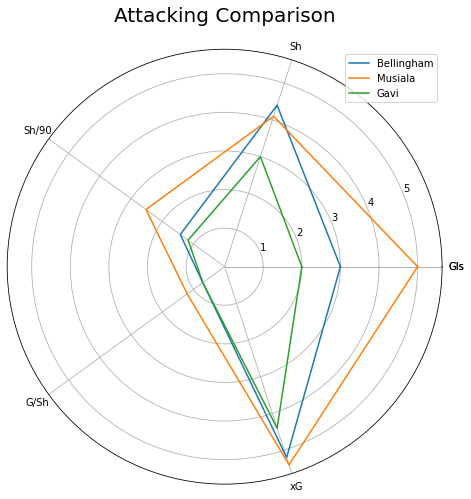

In [37]:
attackingComparison = makeRadarChart(list(orgaShooting.columns[1:]),list(orgaShooting.loc[0][1:]),\
                                        list(orgaShooting.loc[1][1:]),list(orgaShooting.loc[2][1:]))
attackingComparison.makeRadar("Attacking Comparison")

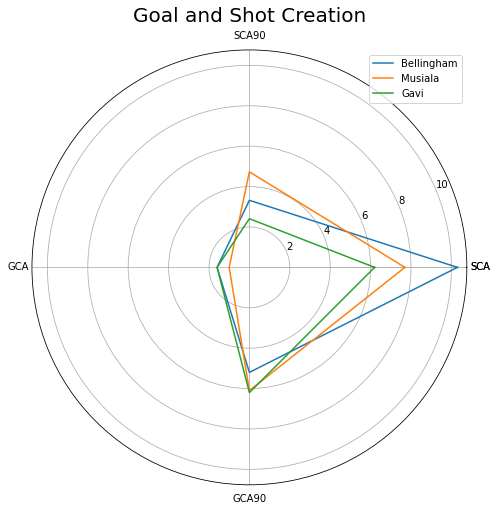

In [38]:
make_GoalandShotCreation_Comparison = makeRadarChart(list(orgaGoalandShotCreation.columns[1:]),\
                                                   list(orgaGoalandShotCreation.loc[0][1:]),\
                                                   list(orgaGoalandShotCreation.loc[1][1:]),\
                                                   list(orgaGoalandShotCreation.loc[2][1:]))
make_GoalandShotCreation_Comparison.makeRadar("Goal and Shot Creation")

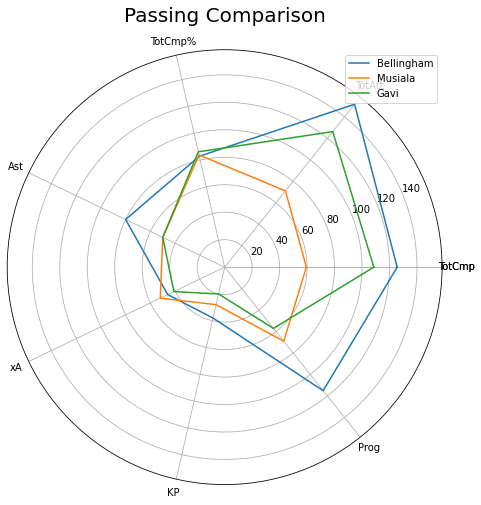

In [39]:
make_Passing_Comparison = makeRadarChart(list(orgaPassing.columns[1:]),list(orgaPassing.loc[0][1:]),\
                                        list(orgaPassing.loc[1][1:]),list(orgaPassing.loc[2][1:]))
make_Passing_Comparison.makeRadar("Passing Comparison")

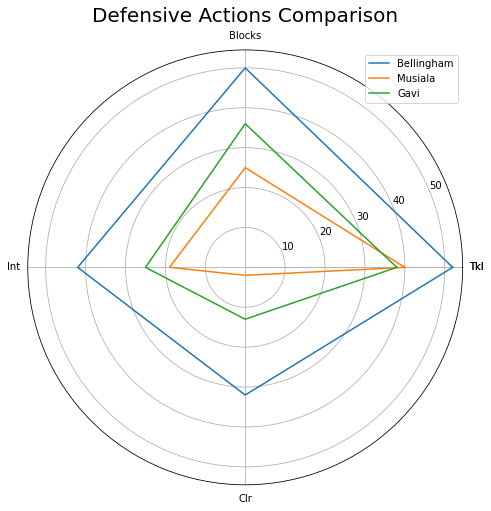

In [40]:
make_DefensiveAction_Comparison = makeRadarChart(list(orgaDefensive.columns[1:]),list(orgaDefensive.loc[0][1:]),\
                                                list(orgaDefensive.loc[1][1:]),list(orgaDefensive.loc[2][1:]))
make_DefensiveAction_Comparison.makeRadar("Defensive Actions Comparison")

# 5. 분석 결과 도출

위의 네개의 chart는 ``공격``, ``전개``,``수비`` 측면에서 세 선수를 비교한 것이다.<br>

첫번째로 ``공격``측면에서는 두가지 자료를 이용했다. ``Shooting``과 ``Goal and Shot Creation``이다.<br>
``Shooting``에서는 ``Musiala``가 장악했고, ``Goal and Shot Creation``에서는<br>
``Musiala``와 ``Bellingham``이 상위권이라고 확인할 수 있다.

두번째로 ``전개``측면에서는 ``Passing``자료를 보면 된다.<br>
``Bellingham``이 거의 모든 영역에서 상대들을 압도했다.<br>

세번째로 ``수비``측면에서 ``Defensive Actions Comparsion``자료를 보자.<br>
이것은 정말 완벽하게 ``Bellingham``선수가 압도했다.

# 6. 결론

시작할 때의 가설을 다시 회상하자면 <br>

'``Gavi``,``Jude Belligham``,``Jamal Musiala`` 세명 중 ``공격``, ``수비`` ,``전개``를 데이터적으로 분석하여 <br>**Golden Boy**와 **Kopa Trophy**가 누구에게 가는 것이 옳은가를 알아볼 것이다.' 이다.<br>



따라서 ``공격``,``수비``,``전개`` 측면에서 가장 좋은 모습을 보인 ``Jude Bellingham``선수에게 <br>
**Golden Boy**와 **Kopa Trophy**상이 가는 것이 데이터적으로 옳아보인다.

하지만 ``축구``는 단순히 데이터적으로만으로는 판단되지 않는 부분도 존재하기 때문에<br>
우수한 세 선수 모두 받을 자격이 있다고 생각한다. ``누가 받아도 이상하지 않다.``

# 7. 참조문헌

1. 축구 데이터 다운로드 <br>
**Bellingham** : https://fbref.com/en/players/57d88cf9/dom_lg/Jude-Bellingham-Domestic-League-Stats<br>

**Musiala** : https://fbref.com/en/players/2c0558b8/dom_lg/Jamal-Musiala-Domestic-League-Stats<br>

**Gavi** : https://fbref.com/en/players/19cae58d/dom_lg/Gavi-Domestic-League-Stats

2. Radar Chart 만드는 코드<br>
https://towardsdatascience.com/how-to-make-stunning-radar-charts-with-python-implemented-in-matplotlib-and-plotly-91e21801d8ca

# 8. (3)의 획득한 데이터 원본

인터넷에서 크롤링을 해왔으므로 데이터 원본은 **7.참조문헌**의 ``1. 축구 데이터 다운로드``와 같다.

# 9. (4)의 획득한 데이터 원본

In [41]:
gavi


<!DOCTYPE html>

<html class="no-js" data-root="/home/fb/deploy/www/base" data-version="klecko-" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
<link href="https://cdn.ssref.net/req/202210281" rel="dns-prefetch"/>
<!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
<script async="true" type="text/javascript">
    (function() {
	var host = window.location.hostname;
	var element = document.createElement('script');
	var firstScript = document.getElementsByTagName('script')[0];
	var url = 'https://cmp.quantcast.com'
	    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, 
		    '/choice.js?tag_version=V2');
	var uspTries = 0;
	var uspTriesLimit = 3;
	element.async = true;
	element.type = 'text/javascript';
	element.src = url;
	
	firstScript.parentNode.insertBefore(element, firstScript);
	
	function makeStub() {
	    var TCF_LOCATOR_NAME = '

In [42]:
req = requests.get("https://fbref.com/en/players/2c0558b8/dom_lg/Jamal-Musiala-Domestic-League-Stats")
Musiala = BeautifulSoup(req.text,'html.parser')
Musiala


<!DOCTYPE html>

<html class="no-js" data-root="/home/fb/deploy/www/base" data-version="klecko-" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
<link href="https://cdn.ssref.net/req/202210281" rel="dns-prefetch"/>
<!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
<script async="true" type="text/javascript">
    (function() {
	var host = window.location.hostname;
	var element = document.createElement('script');
	var firstScript = document.getElementsByTagName('script')[0];
	var url = 'https://cmp.quantcast.com'
	    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, 
		    '/choice.js?tag_version=V2');
	var uspTries = 0;
	var uspTriesLimit = 3;
	element.async = true;
	element.type = 'text/javascript';
	element.src = url;
	
	firstScript.parentNode.insertBefore(element, firstScript);
	
	function makeStub() {
	    var TCF_LOCATOR_NAME = '

In [43]:
req = requests.get("https://fbref.com/en/players/57d88cf9/dom_lg/Jude-Bellingham-Domestic-League-Stats")
Bellingham = BeautifulSoup(req.text,'html.parser')
Bellingham


<!DOCTYPE html>

<html class="no-js" data-root="/home/fb/deploy/www/base" data-version="klecko-" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
<link href="https://cdn.ssref.net/req/202210281" rel="dns-prefetch"/>
<!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
<script async="true" type="text/javascript">
    (function() {
	var host = window.location.hostname;
	var element = document.createElement('script');
	var firstScript = document.getElementsByTagName('script')[0];
	var url = 'https://cmp.quantcast.com'
	    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, 
		    '/choice.js?tag_version=V2');
	var uspTries = 0;
	var uspTriesLimit = 3;
	element.async = true;
	element.type = 'text/javascript';
	element.src = url;
	
	firstScript.parentNode.insertBefore(element, firstScript);
	
	function makeStub() {
	    var TCF_LOCATOR_NAME = '

# 10. (3)을 (4)로 변환하는 등의 작업을 위하여 본인이 직접 개발한 Python 소스코드 원본

## 1) 크롤링한 뒤 필요한 자료 뽑는 함수
```python
def textClear(x) : 
    list = []
    for i in range(1,len(x)) :
        list.append(x[i].text)
    return list
```

## 2) 1) 함수에서 좀 더 보완한 함수 , 크롤링 작업이 같이 되고 return 값을 1)값으로 내보냄
```python
def makePlayerStat(x,y) :
    '''x is string type url.
    y is Player Name.
    '''
    req = requests.get(x)
    y = BeautifulSoup(req.text,"html.parser")
    y.list = y.find_all("table")
    return textClear(y.list) 
```

## 3) 정리한 CSV파일을 대입해서 class 객체를 만들고 class안에서 Radar Chart를 만드는 함수
```python
class makeRadarChart :
    def __init__(self,givenCategories,givenLoc1,givenLoc2,givenLoc3) :
        self.givenCategories = givenCategories
        self.givenLoc1 = givenLoc1
        self.givenLoc2 = givenLoc2
        self.givenLoc3 = givenLoc3
        
        self.givenCategories = [*self.givenCategories,self.givenCategories[0]]
        self.givenLoc1 = [*self.givenLoc1,self.givenLoc1[0]]
        self.givenLoc2 = [*self.givenLoc2,self.givenLoc2[0]]
        self.givenLoc3 = [*self.givenLoc3,self.givenLoc3[0]]
        
        
    def makeRadar(self,givenChartName) :
        import numpy as np
        import matplotlib.pyplot as plt
    
        label_loc = np.linspace(start = 0 ,stop = 2 * np.pi, num = len(self.givenCategories))
        
        plt.figure(figsize=(8,8))
        plt.subplot(polar=True)
        plt.plot(label_loc,self.givenLoc1,label = "Bellingham")
        plt.plot(label_loc,self.givenLoc2,label = "Musiala")
        plt.plot(label_loc,self.givenLoc3,label = "Gavi")
        plt.title(givenChartName,size=20 , y = 1.05)
        lines, labels = plt.thetagrids(np.degrees(label_loc),labels = self.givenCategories)
        plt.legend()
        plt.show()
```